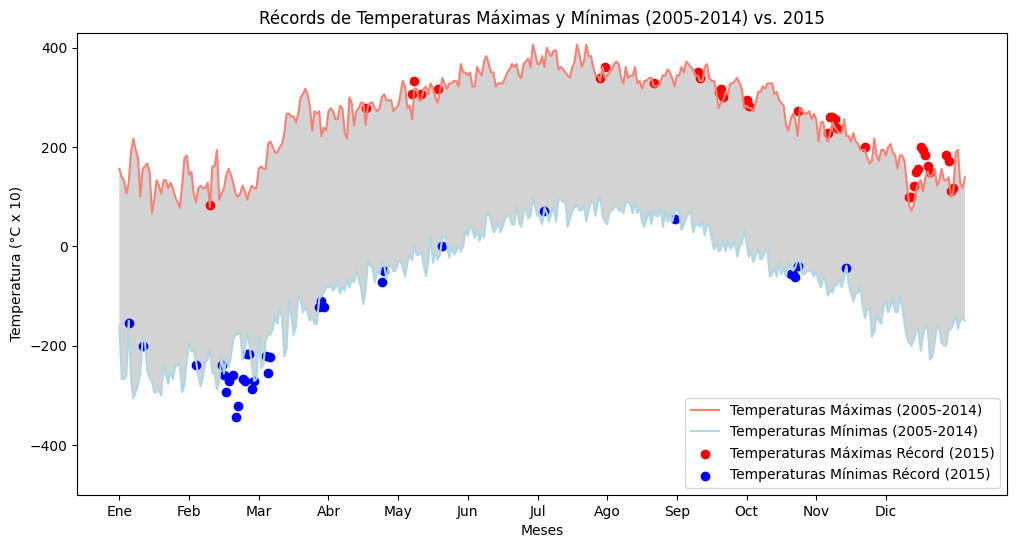

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

# Convierte la columna 'Date' a datetime
df['Date'] = pd.to_datetime(df['Date'])

# Ordenar por fecha
df.sort_values(by='Date', inplace=True)

# Crear columnas de Año, Mes y Día
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Eliminar el 29 de febrero (día bisiesto)
df1 = df[~((df['Month'] == 2) & (df['Day'] == 29))]

# Filtrar datos para el período 2005-2014
df_decada = df1[(df1['Year'] >= 2005) & (df1['Year'] <= 2014)]

# Encontrar los registros de temperaturas máximas y mínimas diarias de 2005-2014
record_max = df_decada.groupby(['Month', 'Day'])['Data_Value'].max().reset_index()
record_min = df_decada.groupby(['Month', 'Day'])['Data_Value'].min().reset_index()

# Crear un DataFrame para los datos de 2015
df_2015 = df1[df1['Year'] == 2015]

# Encontrar los registros de temperaturas máximas y mínimas diarias de 2015
record_max_2015 = df_2015.groupby(['Month', 'Day'])['Data_Value'].max().reset_index()
record_min_2015 = df_2015.groupby(['Month', 'Day'])['Data_Value'].min().reset_index()

# Encontrar los récords de 2015 que superan los récords de 2005-2014
record_max_superados = record_max_2015[record_max_2015['Data_Value'] > record_max['Data_Value']]
record_min_superados = record_min_2015[record_min_2015['Data_Value'] < record_min['Data_Value']]

# Valores en el eje X
x_values = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]

# Nombres de los meses del año
month_names = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
# Crear el gráfico
plt.figure(figsize=(12, 6))

# Gráfico de líneas para los récords de temperaturas máximas y mínimas de 2005-2014
plt.plot(record_max['Data_Value'], color='salmon', label='Temperaturas Máximas (2005-2014)')
plt.plot(record_min['Data_Value'], color='lightblue', label='Temperaturas Mínimas (2005-2014)')

# Sombrar el área entre las temperaturas máximas y mínimas de 2005-2014
plt.fill_between(range(len(record_max)), record_min['Data_Value'], record_max['Data_Value'], facecolor='lightgray')

# Dispersión de los récords superados en 2015
plt.scatter(record_max_superados.index, record_max_superados['Data_Value'], color='red', marker='o', label='Temperaturas Máximas Récord (2015)')
plt.scatter(record_min_superados.index, record_min_superados['Data_Value'], color='blue', marker='o', label='Temperaturas Mínimas Récord (2015)')

# Configuración del gráfico
plt.title('Récords de Temperaturas Máximas y Mínimas (2005-2014) vs. 2015')
plt.xlabel('Meses')
plt.ylabel('Temperatura (°C x 10)')
plt.legend(loc='lower right')
# Configura el eje X
plt.xticks(x_values, month_names)

plt.ylim(-500, max(x_values) + 100)

# Mostrar el gráfico
plt.show()